In [1]:
pip install missingno missingpy # ESTO SE DEBE INSTALAR EN LA TERMINAL

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# IMPORTAR LIBRERÍAS NECESARIAS
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# CREAR EL DATAFRAME CON PANDAS
df = pd.read_csv("/workspaces/cathycaz-intro-ml/data/raw/internal-link.csv")
# CON ESTE CÓDIGO SE IMPORTA EL DOCUMENTO CON FORMATO CSV
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# ESTABLECER EL ID COMO ÍNDICE
df.set_index("id", inplace=True) # CON ESTE CÓDIGO ESTABLEZCO LA COLUMNA QUE YO DESEE COMO ÍNDICE (EN ESTE CASO LA COLUMNA "id")
pd.set_option('display.max_columns', None) # ESTO SIRVE PARA QUE ME MUESTRE TODAS LAS COLUMNAS CUANDO UN DATAFRAME ES MUY ANCHO O CON MUCHAS COLUMNAS 
# CON EL None LE DIGO QUE ME MUESTRE TODAS LAS COLUMNAS SIN LIMITACIÓN
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# INFORMACIÓN DE LA TABLA
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

In [6]:
# COMPROBACION DE CUANTOS VALORES DISTINTOS HAY EN CADA COLUMNA
unicos = df.nunique() # Cuenta cuántos valores distintos hay en cada columna del DataFrame y guarda ese conteo en unicos
unicos

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [7]:
# AHORA MOSTRAMOS LAS COLUMNAS QUE TENGAN UN SOLO VALOR
df[unicos[unicos==1].index]  # Muestra las columnas que tienen un solo valor único
# NO HAY COLUMNAS CON UN SOLO VALOR

""
id
2539
2595
3647
3831
5022
...
36484665
36485057
36485431


SI HUBIESEN COLUMNAS CON DATOS UNICOS APLICAMOS ESTA FÓRMULA

df.drop(unicos[unicos==1].index, axis=1, inplace=True)

In [8]:
# COMPROBACIÓN DE DATOS DUPLICADOS EN TODAS LAS FILAS POR DEFECTO
df.duplicated().sum()
# NO HAY FILAS DUPLICADAS

np.int64(0)

In [9]:
# AUNQUE SABEMOS QUE NO HAY VALORES DIPLICADOS CON ESTE CÓDIGO PUEDO GENERAR UNA TABLA CON TRUE Y FALSE (TRUE FILAS CON DATOS DUPLICADOS Y FALSE FILAS SIN DATOS DUPLICADOS)
df.duplicated(keep=False) 

id
2539        False
2595        False
3647        False
3831        False
5022        False
            ...  
36484665    False
36485057    False
36485431    False
36485609    False
36487245    False
Length: 48895, dtype: bool

In [10]:
# COMPROBACIÓN DE DATOS DUPLICADOS EN (COLUMNAS DE LAS DATA ORIGINAL) QUE CON LA TRANSPUESTA LAS CONVERTIMOS EN FILAS 
df.T.duplicated().sum()
# NO HAY FILAS DUPLICADAS EN LA TRANSPUESTA

np.int64(0)

In [11]:
# AUNQUE SABEMOS QUE NO HAY VALORES DIPLICADOS CON ESTE CÓDIGO PUEDO GENERAR UNA TABLA CON TRUE Y FALSE (TRUE FILAS CON DATOS DUPLICADOS Y FALSE FILAS SIN DATOS DUPLICADOS)
df.T.duplicated(keep=False) 

name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

EN ESTE CASO NO HAY DATOS DUPLICADOS, PERO SI ENCONTRAMOS DATOS DUPLICADOS EN UNA COLUMNA APLICAMOS ESTO 

df.drop('nombre de la columna', axis=1, inplace=True)

In [17]:
#ELIMINAR COLUMNAS QUE NO APORTAN INFORMACIÓN IMPORTANTE O SON REDUNDANTES
# PRIMERO VERIFICO 
# host_name POR host_id
host_name_por_id = df.groupby('host_id')['host_name'].nunique() # ESTO ME GENERA UN GROUPBY Y ME INDICA LOS VALORES UNICOS 
print("host_id con >1 host_name:", (host_name_por_id > 1).sum())

host_id con >1 host_name: 0


In [16]:
#ELIMINAR COLUMNAS QUE NO APORTAN INFORMACIÓN IMPORTANTE O SON REDUNDANTES
# PRIMERO VERIFICO 
# name POR id
id_name = df.groupby('id')['name'].nunique()
print("id con >1 name:", (id_name > 1).sum())

id con >1 name: 0


In [18]:
# GENERAMOS TABLA PARA VISUALIZARLO MEJOR
df.groupby('host_id')['host_name'].nunique()

host_id
2438         1
2571         1
2787         1
2845         1
2868         1
            ..
274273284    1
274298453    1
274307600    1
274311461    1
274321313    1
Name: host_name, Length: 37457, dtype: int64

In [19]:
# GENERAMOS TABBLA PARA VISUALIZARLO MEJOR
df.groupby('id')['name'].nunique()

id
2539        1
2595        1
3647        1
3831        1
5022        1
           ..
36484665    1
36485057    1
36485431    1
36485609    1
36487245    1
Name: name, Length: 48895, dtype: int64

In [20]:
# CON EL LENGTH (LENGTH: 37457) INTUIMOS QUE UN IDENTIFICADOR PUEDE TENER VARIAS PROPIEDADES
# ENTONCES CONTAMOS LOS HOST_ID...
df['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
32045          1
7355           1
45445          1
24680832       1
274035866      1
Name: count, Length: 37457, dtype: int64

In [21]:
# LO METEMOS EN UNA VARIABLE PARA VERIFICAR CUANTAS PROPIEDADES TIENE CADA HOST ID EN PORCENTAJES
pisos=df['host_id'].value_counts()
pisos[pisos==1].count()/pisos.count()*100

np.float64(86.24022212136583)

In [22]:
# LO METEMOS EN UNA VARIABLE PARA VERIFICAR CUANTAS PROPIEDADES TIENE CADA HOST ID EN PORCENTAJES
pisos=df['host_id'].value_counts()
pisos[pisos==2].count()/pisos.count()*100

np.float64(8.887524361267587)

In [23]:
# LO METEMOS EN UNA VARIABLE PARA VERIFICAR CUANTAS PROPIEDADES TIENE CADA HOST ID EN PORCENTAJES
pisos=df['host_id'].value_counts()
pisos[pisos==3].count()/pisos.count()*100

np.float64(2.5389112849400646)

CON ESTO SE PUEDE CONCLUIR QUE PODEMOS ESTABLECER UNA NUEVA COLUMNA CON SOLO DOS INDICADORES SEGÚN EL NÚMERO DE PROPIEDADES POR HOST_ID Y ASI IR NORMALIZANDO VALORES 

In [24]:
# HACEMOS UN MAPEO POR LA COLUMNA HOST_ID PARA LUEGO INSERTAR UNA NUEVA COLUMNA CON LOS INDICADORES QUE QUEREMOS
# ESCOGEMOS COMO PROFESINALES A LOS PROPIETARIOS CON 2 O MAS PROPIEDADES EN ALQUILER Y LE ASIGNAMOS EL VALOR 1
# Y A LOS QUE TIENEN UNA SOLA PROPIEDAD LE ASIGNAMOS EL VALOR 0
pisos=df['host_id'].value_counts()
indicator = df['host_id'].map(lambda x: 1 if pisos.get(x, 0) >= 2 else 0)

In [25]:
# LOCALIZAR LA POSICION DE HOST ID PARA METER LA COLUMNA NUEVA JUSTO DESPUES 
posicion = df.columns.get_loc('host_id')
df.insert(posicion+1, 'host_more_than_2', indicator)

In [26]:
# COMPROBAMOS LA TABLA CON LA NUEVA COLUMNA
df.head()

,name,host_id,host_more_than_2,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,1,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
# AHORA PODEMOS ELIMINAR HOST NAME Y DEJAMOS HOTS ID
df.drop(['host_name'], axis=1, inplace=True)

In [28]:
# ELIMINAMOS NAME Y DEJAMOS ID
df.drop(['name'], axis=1, inplace=True)

In [29]:
# NUEVO DATAFRAME SIN LA COLUMNA HOST_NAME NI NAME
df.head()

,host_id,host_more_than_2,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
2539,2787,1,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,0,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,0,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,0,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
# DATOS FALTANTES EN NUMEROS 
df.isnull().sum()

host_id                               0
host_more_than_2                      0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [34]:
# DATOS FALTANTES EN PORCENTAJE
df.isnull().mean()*100

host_id                            0.000000
host_more_than_2                   0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

DE MOMENTO NO ELIMINARE LAS COLUMNAS CON DATOS FALTANTES PORQUE NO SABEMOS SI MAS ADELANTE ME PUEDAN SERVIR! Y ADEMAS ES UN 20%

In [35]:
# COMPROBAR LOS DATOS CON FILAS QUE TIENEN DATOS NULOS MAYORES A 2
n = 2
df[df.isnull().sum(axis=1) ==n]

,host_id,host_more_than_2,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
3647,4632,0,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
7750,17985,1,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
8700,26394,0,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
11452,7355,0,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
11943,45445,0,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,8232441,1,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
36485057,6570630,1,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
36485431,23492952,0,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


<Axes: >

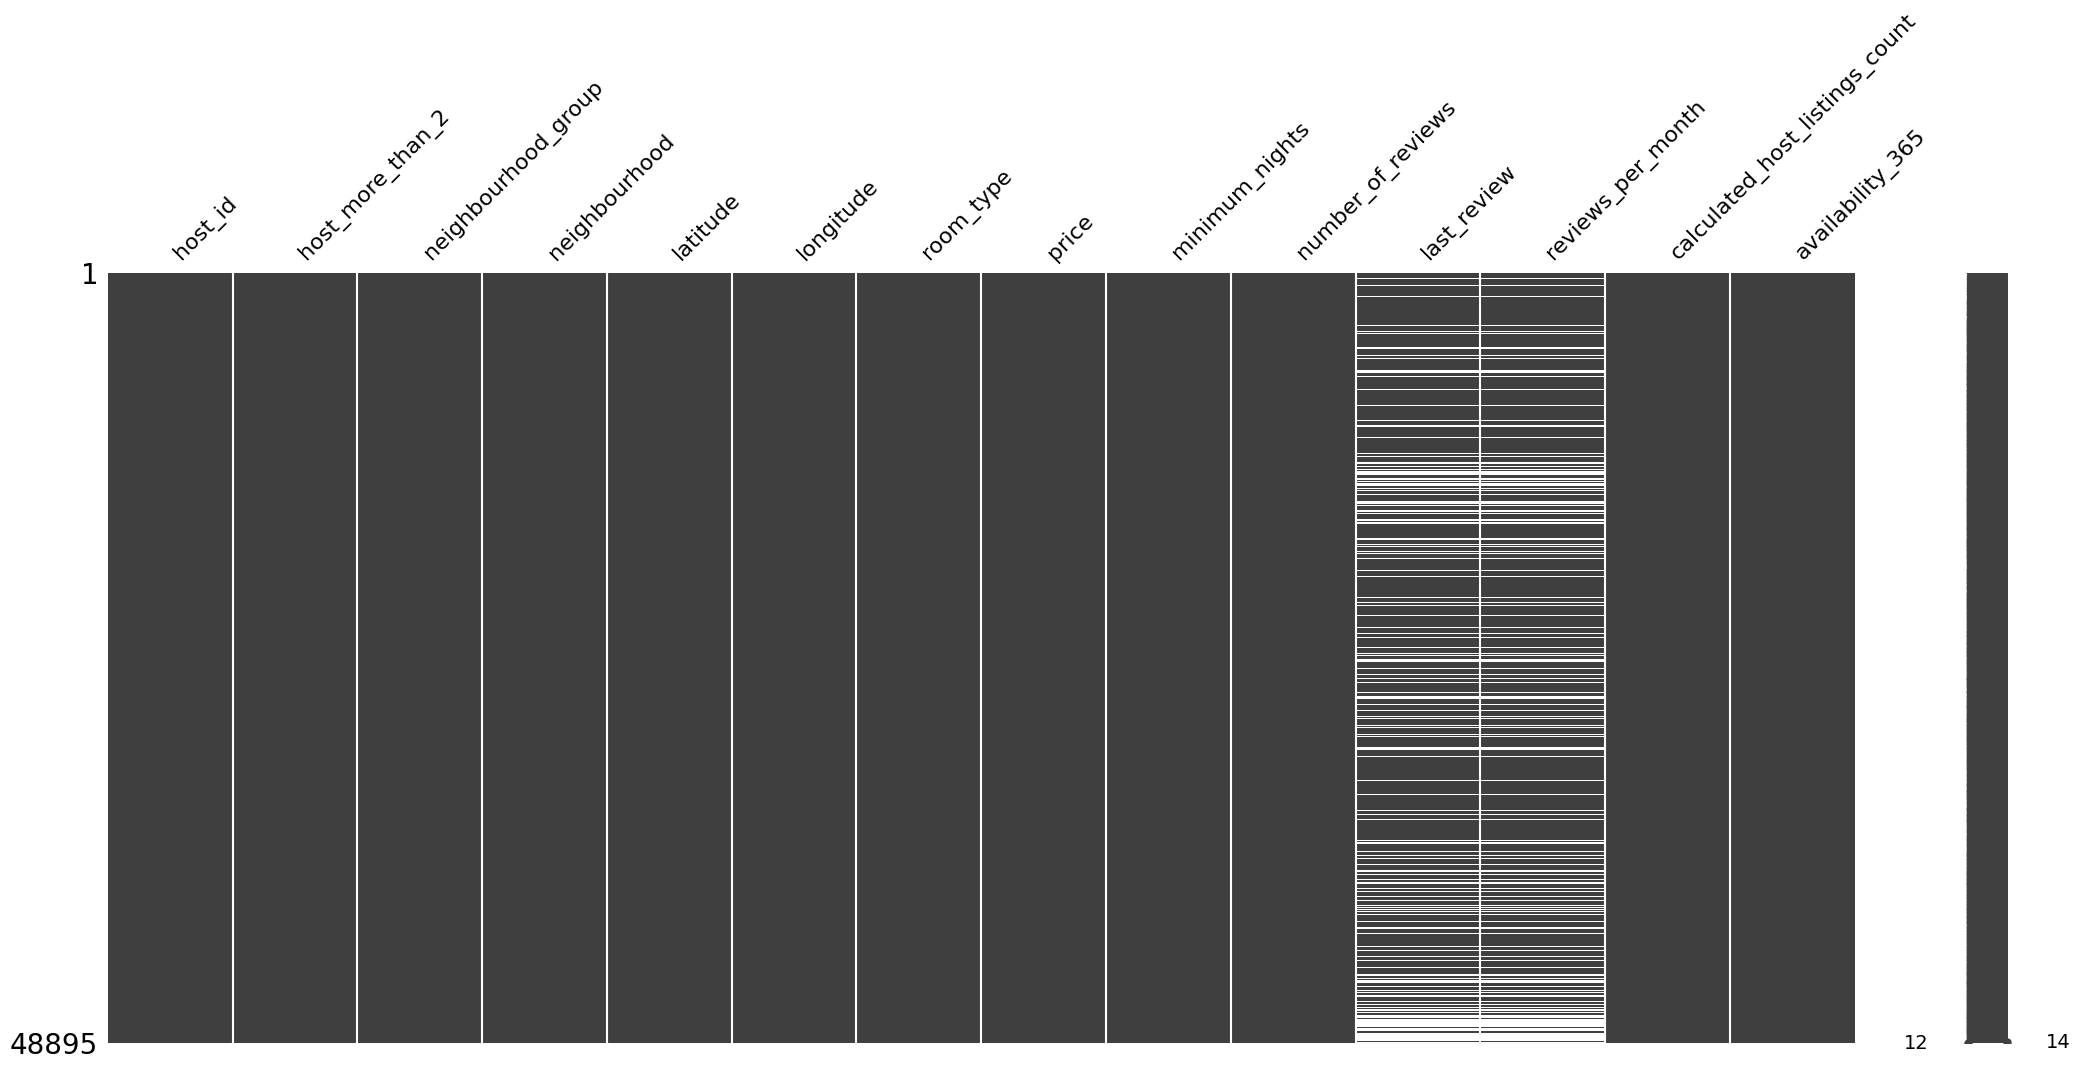

In [36]:
# VISUALIZACION DE DATOS FALTANTES CON MISSINGNO EN FORMA DE MATRIZ
msno.matrix(df)